In [3]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml
from scipy.interpolate import interpn
import pandas as pd
import seaborn as sn
import scipy
import scipy.signal

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../../Databank/Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

def plotFF(FormFactor): #, color, linewidth):
    x = []
    y= []
    for i in FormFactor:
        x.append(i[0])
        y.append(i[1])
    return x,y
    #plt.plot(x,y,color = color, linewidth = linewidth)
    
def plotOrderParameters(OPsim):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGsimERR = []
    yValuesSN1simERR = []
    yValuesSN2simERR = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    sn1carbons = {'M_G1C3_M M_G1C3H1_M' :2,
                  'M_G1C3_M M_G1C3H2_M' :2,
                  'M_G1C4_M M_G1C4H1_M' :3,
                  'M_G1C4_M M_G1C4H2_M' :3,
                  'M_G1C5_M M_G1C5H1_M' :4,
                  'M_G1C5_M M_G1C5H2_M' :4,
                  'M_G1C6_M M_G1C6H1_M' :5,
                  'M_G1C6_M M_G1C6H2_M' :5,
                  'M_G1C7_M M_G1C7H1_M' :6,
                  'M_G1C7_M M_G1C7H2_M' :6,
                  'M_G1C8_M M_G1C8H1_M' :7,
                  'M_G1C8_M M_G1C8H2_M' :7,
                  'M_G1C9_M M_G1C9H1_M' :8,
                  'M_G1C9_M M_G1C9H2_M' :8,
                  'M_G1C10_M M_G1C10H1_M' :9,
                  'M_G1C10_M M_G1C10H2_M' :9,
                  'M_G1C11_M M_G1C11H1_M' :10,
                  'M_G1C11_M M_G1C11H2_M' :10,
                  'M_G1C12_M M_G1C12H1_M' :11,
                  'M_G1C12_M M_G1C12H2_M' :11,
                  'M_G1C13_M M_G1C13H1_M' :12,
                  'M_G1C13_M M_G1C13H2_M' :12,
                  'M_G1C14_M M_G1C14H1_M' :13,
                  'M_G1C14_M M_G1C14H2_M' :13,
                  'M_G1C15_M M_G1C15H1_M' :14,
                  'M_G1C15_M M_G1C15H2_M' :14,
                  'M_G1C16_M M_G1C16H1_M' :15,
                  'M_G1C16_M M_G1C16H2_M' :15,
                  'M_G1C17_M M_G1C17H1_M' :16,
                  'M_G1C17_M M_G1C17H2_M' :16,
                  'M_G1C17_M M_G1C17H3_M' :16,
                 }
    
    sn2carbons = {'M_G2C3_M M_G2C3H1_M' :2,
                  'M_G2C3_M M_G2C3H2_M' :2,
                  'M_G2C4_M M_G2C4H1_M' :3,
                  'M_G2C4_M M_G2C4H2_M' :3,
                  'M_G2C5_M M_G2C5H1_M' :4,
                  'M_G2C5_M M_G2C5H2_M' :4,
                  'M_G2C6_M M_G2C6H1_M' :5,
                  'M_G2C6_M M_G2C6H2_M' :5,
                  'M_G2C7_M M_G2C7H1_M' :6,
                  'M_G2C7_M M_G2C7H2_M' :6,
                  'M_G2C8_M M_G2C8H1_M' :7,
                  'M_G2C8_M M_G2C8H2_M' :7,
                  'M_G2C9_M M_G2C9H1_M' :8,
                  'M_G2C9_M M_G2C9H2_M' :8,
                  'M_G2C10_M M_G2C10H1_M' :9,
                  'M_G2C10_M M_G2C10H2_M' :9,
                  'M_G2C11_M M_G2C11H1_M' :10,
                  'M_G2C11_M M_G2C11H2_M' :10,
                  'M_G2C12_M M_G2C12H1_M' :11,
                  'M_G2C12_M M_G2C12H2_M' :11,
                  'M_G2C13_M M_G2C13H1_M' :12,
                  'M_G2C13_M M_G2C13H2_M' :12,
                  'M_G2C14_M M_G2C14H1_M' :13,
                  'M_G2C14_M M_G2C14H2_M' :13,
                  'M_G2C15_M M_G2C15H1_M' :14,
                  'M_G2C15_M M_G2C15H2_M' :14,
                  'M_G2C16_M M_G2C16H1_M' :15,
                  'M_G2C16_M M_G2C16H2_M' :15,
                  'M_G2C17_M M_G2C17H1_M' :16,
                  'M_G2C17_M M_G2C17H2_M' :16,
                  'M_G2C17_M M_G2C17H3_M' :16,
                  'M_G2C18_M M_G2C18H1_M' :17,
                  'M_G2C18_M M_G2C18H2_M' :17,
                  'M_G2C18_M M_G2C18H3_M' :17,
                  'M_G2C19_M M_G2C19H1_M' :18,
                  'M_G2C19_M M_G2C19H2_M' :18,
                  'M_G2C19_M M_G2C19H3_M' :18,
                 }
    
    HGcarbons = {'M_G3N6C1_M M_G3N6C1H1_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H2_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H3_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H1_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H2_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H3_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H1_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H2_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H3_M' : 1,
                 'M_G3C5_M M_G3C5H1_M' : 2,
                 'M_G3C5_M M_G3C5H2_M' : 2,
                 'M_G3C4_M M_G3C4H1_M' : 3,
                 'M_G3C4_M M_G3C4H2_M' : 3,
                 'M_G3_M M_G3H1_M' : 4,
                 'M_G3_M M_G3H2_M' : 4,
                 'M_G2_M M_G2H1_M' : 5,
                 'M_G1_M M_G1H1_M' : 6,
                 'M_G1_M M_G1H2_M' : 6,
                 }
    
    
    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(sn1carbons[key])
            yValuesSN1sim.append(float(OPsim[key][0][0]))
            yValuesSN1simERR.append(float(OPsim[key][0][2]))
            #yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(sn2carbons[key])
            yValuesSN2sim.append(float(OPsim[key][0][0]))
            yValuesSN2simERR.append(float(OPsim[key][0][2]))
            #yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key or 'M_G2_M' in key or 'M_G1_M' in key:
            xValuesHG.append(HGcarbons[key])
            yValuesHGsim.append(float(OPsim[key][0][0]))
            yValuesHGsimERR.append(float(OPsim[key][0][2]))
            #yValuesHGexp.append(OPexp[key][0][0])
    
    return xValuesSN1, yValuesSN1sim, yValuesSN1simERR, xValuesSN2, yValuesSN2sim, yValuesSN2simERR, xValuesHG, yValuesHGsim, yValuesHGsimERR 
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


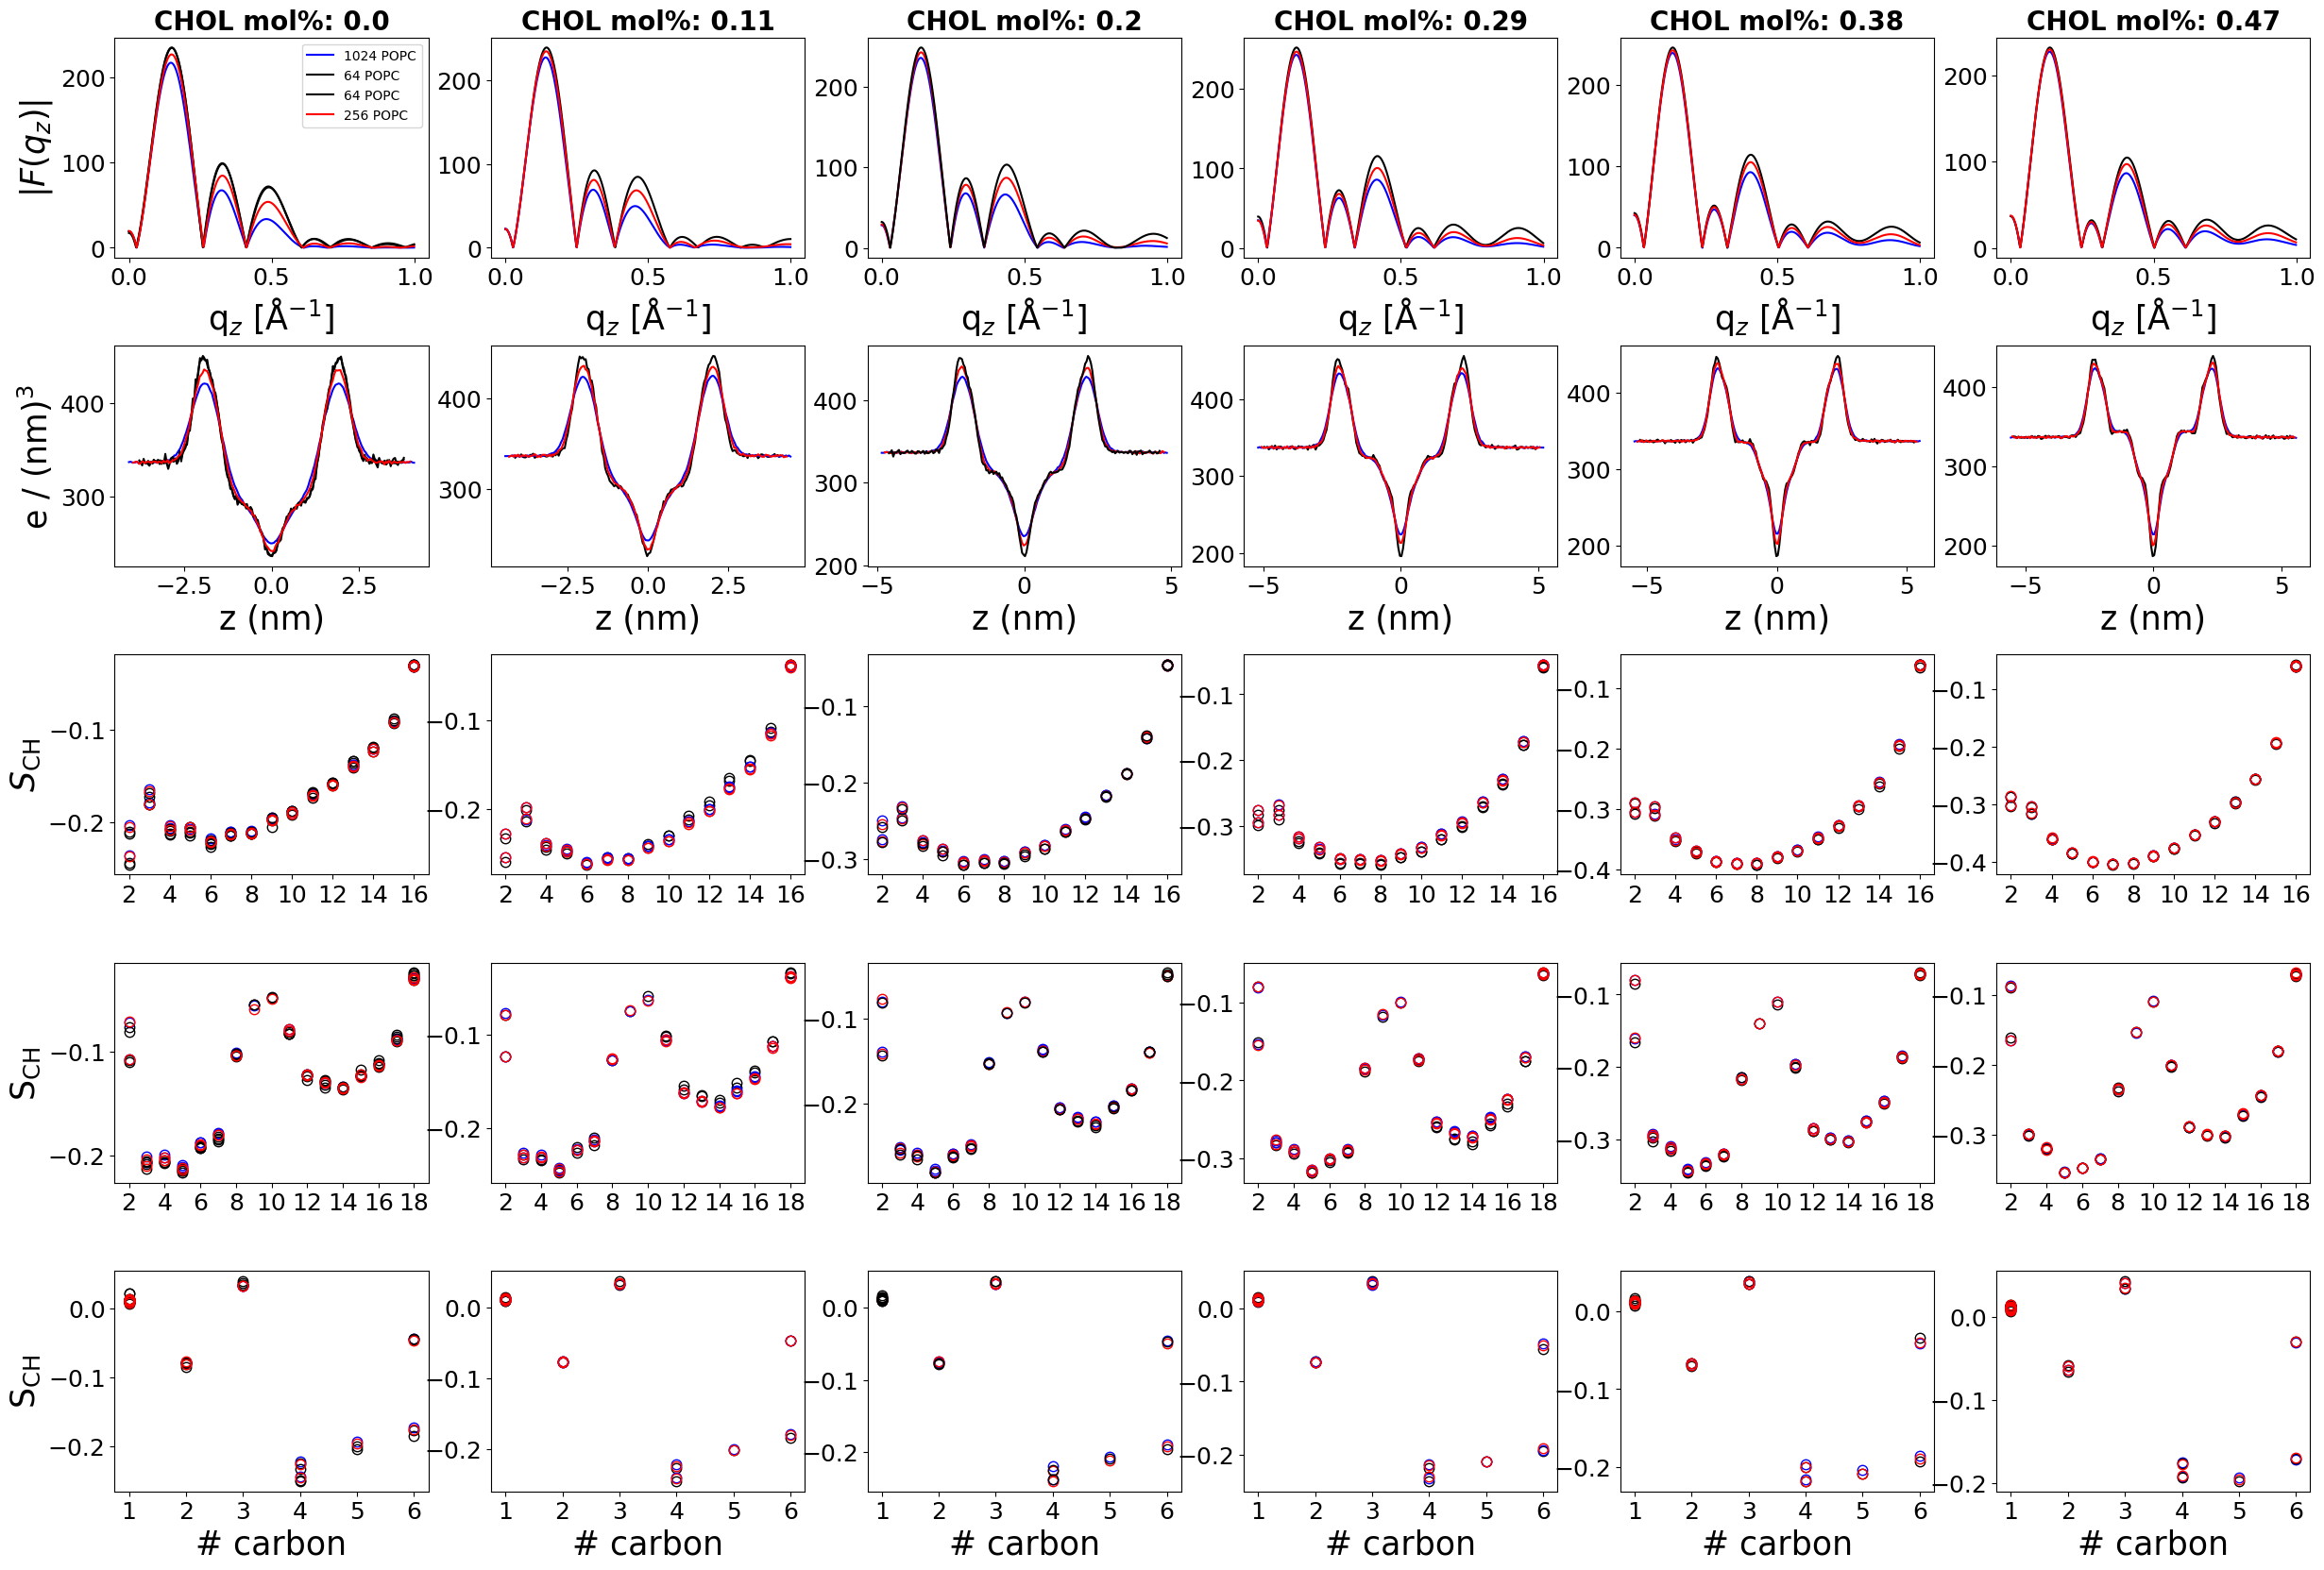

In [4]:
#colors = {0: 'black', 0.25: 'red', 0.125: 'blue', 0.625: 'green', 0.40625: 'yellow', 0.875:'orange'}
colors = {64: 'black', 256: 'red', 1024: 'blue'} #, 0.625: 'green', 0.40625: 'yellow', 0.875:'orange'}
widths = {64: 1, 256: 2, 1024: 3}
plotLoc = {0: 0, 0.11: 1, 0.2: 2, 0.29: 3, 0.38: 4, 0.47: 5}

fig, axs = plt.subplots(5,6,figsize=(30,20)) #, gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.4)

for system in systems:
    if '10.5281/zenodo.5767451' in system['DOI'] or '10.5281/zenodo.7103807' in system['DOI']:
        FormFactorPath = system['path'] + 'FormFactor.json'
        f = open(FormFactorPath)
        FormFactor = json.load(f)
        DensityPath = system['path'] + 'TotalDensity.json'
        f = open(DensityPath)
        Density = json.load(f)
        
        try:
            Nchol = np.sum(system['COMPOSITION']['CHOL']['COUNT'])
        except:
            Nchol = 0
        if 'POPC' not in system['COMPOSITION']:
            continue
        Npopc = np.sum(system['COMPOSITION']['POPC']['COUNT'])
        ratio = round(Nchol/(Npopc+Nchol),2)
        
        x,y = plotFF(FormFactor)
        xdens,ydens = plotFF(Density)
        
      
        lipid = 'POPC'
        OPpathSIM = system['path'] + lipid + 'OrderParameters.json'
        with open(OPpathSIM) as json_file:
            OPsim = json.load(json_file)
        xValuesSN1, yValuesSN1sim, yValuesSN1simERR, xValuesSN2, yValuesSN2sim, yValuesSN2simERR, xValuesHG, yValuesHGsim, yValuesHGsimERR = plotOrderParameters(OPsim) 
        
    
        label = str(Npopc) + ' POPC'
        axs[0][plotLoc[ratio]].plot(x,y, color = colors[Npopc], label = label)
        axs[0][0].set_ylabel('$|F(q_z)|$', fontsize=25)
        axs[0][plotLoc[ratio]].set_xlabel('q$_z$ [Å$^{-1}$]', fontsize=25)
        axs[1][plotLoc[ratio]].plot(xdens,ydens, color = colors[Npopc], label = label)
        axs[1][0].set_ylabel('e / (nm)$^3$', fontsize=25)
        axs[1][plotLoc[ratio]].set_xlabel('z (nm)', fontsize=25)
        axs[2][plotLoc[ratio]].plot(xValuesSN1, yValuesSN1sim, '.', color = colors[Npopc], fillstyle='none', label = label, markersize=15)
        axs[3][plotLoc[ratio]].plot(xValuesSN2, yValuesSN2sim, '.', color = colors[Npopc], fillstyle='none', label = label, markersize=15)
        axs[4][plotLoc[ratio]].plot(xValuesHG, yValuesHGsim, '.', color = colors[Npopc], fillstyle='none', label = label, markersize=15)
        axs[2][0].set_ylabel('$S_\mathrm{CH}$', fontsize=25)
        axs[2][plotLoc[ratio]].set_xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+1, 2.0))
        axs[3][plotLoc[ratio]].set_xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+3, 2.0))
        axs[4][plotLoc[ratio]].set_xticks([1, 2, 3, 4, 5 ,6])
        axs[3][0].set_ylabel('S$_\mathrm{CH}$', fontsize=25)
        axs[4][0].set_ylabel('S$_\mathrm{CH}$', fontsize=25)
        axs[4][plotLoc[ratio]].set_xlabel('# carbon', fontsize=25)
        axs[0][0].legend()
        title = 'CHOL mol%: ' + str(ratio)
        axs[0][plotLoc[ratio]].set_title(title, fontweight="bold", size=20)
        
        axs[0][plotLoc[ratio]].tick_params(labelsize=18)
        axs[1][plotLoc[ratio]].tick_params(labelsize=18)
        axs[2][plotLoc[ratio]].tick_params(labelsize=18)
        axs[3][plotLoc[ratio]].tick_params(labelsize=18)
        axs[4][plotLoc[ratio]].tick_params(labelsize=18)
        
fig.savefig("../figures/SizeDependence.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


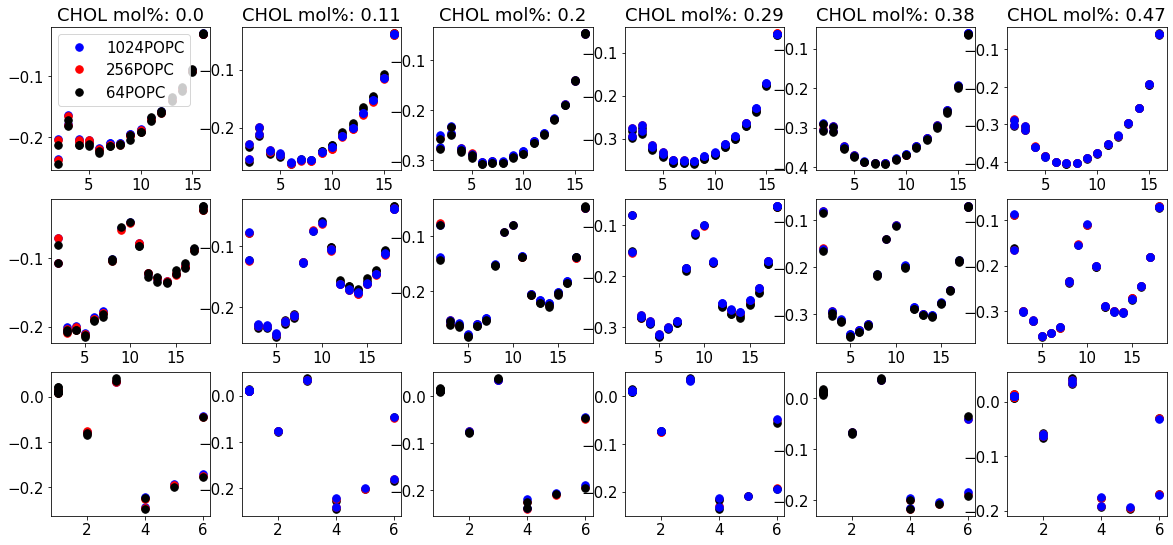

In [36]:
#colors = {0: 'black', 0.25: 'red', 0.125: 'blue', 0.625: 'green', 0.40625: 'yellow', 0.875:'orange'}
colors = {64: 'black', 256: 'red', 1024: 'blue'} #, 0.625: 'green', 0.40625: 'yellow', 0.875:'orange'}
widths = {64: 1, 256: 2, 1024: 3}
plotLoc = {0: 0, 0.11: 1, 0.2: 2, 0.29: 3, 0.38: 4, 0.47: 5}

fig, axs = plt.subplots(3,6,figsize=(20,9)) #, gridspec_kw={'height_ratios': [1, 2]})



for system in systems:
    FormFactorPath = system['path'] + 'FormFactor.json'
    try: 
        f = open(FormFactorPath)
    except:
        continue
    FormFactor = json.load(f)

    
    #plt.figure(figsize=(16, 8)) 
    #f = plt.figure(figsize=(10,3))
    #ax = f.add_subplot(161)
    #ax2 = f.add_subplot(162)
    
    if '10.5281/zenodo.5767451' in system['DOI']:
        try:
            Nchol = np.sum(system['COMPOSITION']['CHOL']['COUNT'])
        except:
            Nchol = 0
        Npopc = np.sum(system['COMPOSITION']['POPC']['COUNT'])
        ratio = round(Nchol/(Npopc+Nchol),2)

        lipid = 'POPC'
        OPpathSIM = system['path'] + lipid + 'OrderParameters.json'
        with open(OPpathSIM) as json_file:
            OPsim = json.load(json_file)
        xValuesSN1, yValuesSN1sim, yValuesSN1simERR, xValuesSN2, yValuesSN2sim, yValuesSN2simERR, xValuesHG, yValuesHGsim, yValuesHGsimERR = plotOrderParameters(OPsim) 
        
        label = str(Npopc) + 'POPC'
        axs[0][plotLoc[ratio]].plot(xValuesSN1, yValuesSN1sim, '.', color = colors[Npopc], label = label, markersize=15)
        axs[1][plotLoc[ratio]].plot(xValuesSN2, yValuesSN2sim, '.', color = colors[Npopc], label = label, markersize=15)
        axs[2][plotLoc[ratio]].plot(xValuesHG, yValuesHGsim, '.', color = colors[Npopc], label = label, markersize=15)
        axs[0][0].legend()
        title = 'CHOL mol%: ' + str(ratio)
        axs[0][plotLoc[ratio]].title.set_text(title)
    
        
    
        #plotOrderParameters(OPsim)
    
    
        
    
        ##print(xValues,yValues)
        #plt.rc('font', size=15)
        ##plt.plot(xValuesHG,yValuesHGsim,'.',color='red',markersize=15)
        ##plt.errorbar(xValuesHG,yValuesHGexp, yerr = 0.02,fmt='.',color='black',markersize=25)
        #plt.errorbar(xValuesHG,yValuesHGsim, yerr = yValuesHGsimERR,fmt='.',color='red',markersize=20)
        ##plt.plot(xValuesHG,yValuesHGexp,'.',color='black',markersize=15)
        #my_xticks = ['\u03B3','\u03B2','\u03B1','$g_{1}$','$g_{2}$','$g_{3}$']
        #plt.xticks([1,2,3,4,5,6], my_xticks,size=20)
        ##plt.xlabel('Carbon')
        #plt.ylim([-0.25,0.09])
        #plt.yticks(size=20)
        ##plt.yticks(color = 'w')
        #plt.ylabel(r'$S_{CH}$',size=25)
        #plt.savefig('HG.pdf')
        #plt.show()
    
        #plt.text(2, -0.04, 'sn-1', fontsize=25)
        #plt.xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+1, 2.0))
        #plt.plot(xValuesSN1,yValuesSN1sim,color='red')
        ##plt.plot(xValuesSN1,yValuesSN1exp,color='black')
        #plt.errorbar(xValuesSN1,yValuesSN1sim, yerr = yValuesSN1simERR,fmt='.',color='red',markersize=25)
        ##plt.errorbar(xValuesSN1,yValuesSN1exp, yerr = 0.02, fmt='.',color='black',markersize=20)
        ##plt.xlabel('Carbon')
        #plt.ylabel(r'$S_{CH}$',size=25)
        #plt.xticks(size=20)
        #plt.yticks(size=20)
        ##plt.yticks(color = 'w')
        #plt.ylim([-0.3,0.01])
        #plt.savefig('sn-1.pdf')
        #plt.show()
    
        #plt.text(2, -0.04, 'sn-2', fontsize=25)
        #plt.xticks(np.arange(min(xValuesSN2), max(xValuesSN2)+1, 2.0))
        #plt.plot(xValuesSN2,yValuesSN2sim,color='red')
        ##plt.plot(xValuesSN2,yValuesSN2exp,color='black')
        #plt.errorbar(xValuesSN2,yValuesSN2sim,yValuesSN2simERR,fmt='.',color='red',markersize=25)
        ##plt.errorbar(xValuesSN2,yValuesSN2exp, yerr = 0.02, fmt='.',color='black',markersize=20)
        #plt.xlabel('Carbon',size=25)
        #plt.ylabel(r'$S_{CH}$',size=25)
        #plt.xticks(size=20)
        #plt.yticks(size=20)
        ##plt.yticks(color = 'w')
        #plt.ylim([-0.25,0.01])
        #plt.savefig('sn-2.pdf')
        #plt.show()



[0.247, 0.388, 0.461, 0.466, 0.468, 0.569, 0.579, 0.591, 0.595, 0.601, 0.604, 0.612, 0.615, 0.618, 0.622, 0.634, 0.639, 0.644, 0.647, 0.652, 0.655, 0.66, 0.663, 0.666, 0.675, 0.681, 0.694, 0.698, 0.704, 0.71, 0.719, 0.722, 0.732, 0.741, 0.744, 0.768, 0.773, 0.779, 0.781, 0.79]
0.031000000000000028


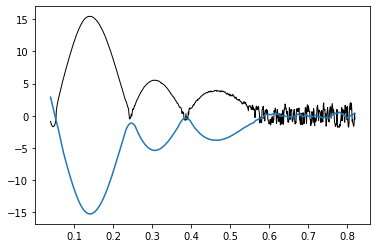

In [41]:
#path = '../../Databank/Data/experiments/FormFactors/10.1021/jp511159q/1/POPE_ULV_35Cin0D_FormFactor.json'
path = '../../Databank/Data/experiments/FormFactors/10.1039/C4SM00066H/1/POPS_ULV_25Cin0D_SHE_FormFactor.json'
#path = '../../Databank/Data/experiments/FormFactors/10.1016/j.bbamem.2011.07.022/2/POPC_ULV_30Cin0D_FormFactor.json'
#path = '../../Databank/Data/experiments/FormFactors/10.1016/j.bbamem.2011.07.022/11/POPC_ULV_40Cin0D_FormFactor.json'

f = open(path)
FormFactor = json.load(f)
plotFF(FormFactor, 'black', 1)

FFtmp = []
FFx = []
for i in FormFactor:
    FFtmp.append(-i[1])
    FFx.append(i[0])

    
#n = 30  # the larger n is, the smoother curve will be
#b = [1.0 / n] * n
#a = 1
#w = scipy.signal.lfilter(b,a,FFtmp)

w = scipy.signal.savgol_filter(FFtmp, 31, 1)

#fs = 30 
#sos = scipy.signal.iirfilter(1, Wn=[0.1, 2.5], fs=fs, btype="bandpass",ftype="butter", output="sos")
#w = scipy.signal.sosfilt(sos, FFtmp)

plt.plot(FFx,w)

#peak_ind = scipy.signal.find_peaks(w)
peak_ind = scipy.signal.find_peaks(w)

#print(FormFactor, FFtmp, w, peak_ind[0])
    
minX = []
for i in peak_ind[0]:
    #print(i)
    minX.append(FormFactor[i][0])

print(minX)

print((FFx[1]-FFx[0])*31)

In [42]:
for system in systems:
    if system['ID'] == 29:
        print(system)

{'DOI': '10.5281/zenodo.1293813', 'SOFTWARE': 'gromacs', 'TRJ': [['md_POPE_hexagonal_membrane_Slipids_CORRECT_200ns_v1_100-200ns.xtc']], 'TPR': [['for-md_POPE_hexagonal_membrane_Slipids_CORRECT_200ns_v1.tpr']], 'PREEQTIME': 100, 'TIMELEFTOUT': 0, 'DIR_WRK': '/usr/home/bort/Databank', 'PUBLICATION': None, 'AUTHORS_CONTACT': 'Thomas Piggot', 'SYSTEM': '336POPE_13460SOL_310K_v1', 'SOFTWARE_VERSION': '5.0.6', 'FF': 'Slipids', 'FF_SOURCE': None, 'FF_DATE': 'pre-2020', 'CPT': None, 'LOG': None, 'TOP': None, 'COMPOSITION': {'POPE': {'NAME': 'POPE', 'MAPPING': 'mappingPOPEslipids.yaml', 'COUNT': [168, 168]}, 'SOL': {'NAME': 'SOL', 'MAPPING': 'mappingSPCwater.yaml', 'COUNT': 13460}}, 'TRAJECTORY_SIZE': 1237168772, 'TRJLENGTH': 100025.0, 'TEMPERATURE': 310.0, 'NUMBER_OF_ATOMS': 82380, 'DATEOFRUNNING': '29/11/2021', 'TYPEOFSYSTEM': 'lipid bilayer', 'EXPERIMENT': {'ORDERPARAMETER': {'POPE': {'10.1021/jacs.1c05549': '10.1021/jacs.1c05549/2', 'unpublished/ferreiraPOPE': 'unpublished/ferreiraPOPE/1'}

In [19]:
!ls ../../Databank/Data/experiments/FormFactors/10.1016/j.bbamem.2011.07.022/11/POPC_ULV_40Cin0D_FormFactor.json

../../Databank/Data/experiments/FormFactors/10.1016/j.bbamem.2011.07.022/11/POPC_ULV_40Cin0D_FormFactor.json


In [ ]:
../../Databank/Data/experiments/FormFactors/10.1016/j.bbamem.2011.07.022/2/POPC_ULV_30Cin0D_FormFactor.json